<a href="https://colab.research.google.com/github/siqueirago/Transfer-Learning-com-Python/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 515s 626ms/step - accuracy: 0.9244 - loss: 0.1840
Epoch 2/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 504s 630ms/step - accuracy: 0.9749 - loss: 0.0680
Epoch 3/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 495s 625ms/step - accuracy: 0.9807 - loss: 0.0537
Epoch 4/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 505s 629ms/step - accuracy: 0.9800 - loss: 0.0552
Epoch 5/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 494s 625ms/step - accuracy: 0.9811 - loss: 0.0481


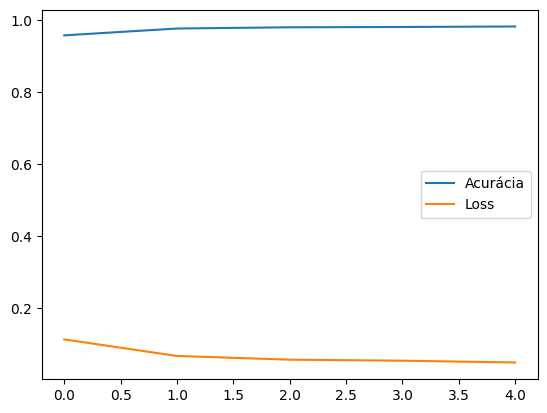

In [16]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models

# Carregar o dataset cats_vs_dogs
dataset_name = 'cats_vs_dogs'
dataset, info = tfds.load(dataset_name, as_supervised=True, with_info=True, split=['train'])
train_dataset = dataset[0]

# Função para aumentar os dados e normalizar as imagens
def preprocess(image, label):
    image = tf.image.resize(image, (160, 160))  # Redimensionar para o tamanho esperado pela MobileNetV2
    image = image / 255.0  # Normalizar os valores dos pixels

    # Aplicar aumento de dados
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, 0.8, 1.2)

    return image, label

# Aplicar a normalização e aumento de dados no dataset
train_dataset = train_dataset.map(preprocess).batch(32).shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Carregar a MobileNetV2 pré-treinada
base_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelar os pesos da rede

# Criar um novo modelo adicionando camadas específicas
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),  # Camada densa adicional para melhor aprendizado
    layers.Dropout(0.3),  # Regularização para evitar overfitting
    layers.Dense(1, activation='sigmoid')  # Saída binária para cães/gatos
])

# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo com mais épocas
history = model.fit(train_dataset, epochs=5)

# Plotar a curva de aprendizado
plt.plot(history.history['accuracy'], label='Acurácia')
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.show()

# Salvar o modelo treinado
model.save('cats_vs_dogs_model.h5')

In [17]:
from tensorflow.keras.models import load_model
# Carregar o modelo treinado
model = load_model('cats_vs_dogs_model.h5')

In [22]:
from google.colab import files
uploaded = files.upload()  # Faz o upload da imagem manualmente


Saving image2.webp to image2 (1).webp


In [23]:
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image

# Nome do arquivo da imagem enviada
image_path = list(uploaded.keys())[0]

# Carregar e preprocessar a imagem
def preprocess_image(image_path):
    img = Image.open(image_path)  # Abre a imagem
    img = img.resize((160, 160))  # Redimensiona para o tamanho esperado pelo modelo
    img = np.array(img) / 255.0   # Normaliza os valores dos pixels
    img = np.expand_dims(img, axis=0)  # Adiciona uma dimensão para batch
    return img

# Processar a imagem
test_image = preprocess_image(image_path)


In [24]:
# Fazer a previsão
prediction = model.predict(test_image)

# Definir a classe com base na saída do modelo
if prediction[0][0] > 0.5:
    print("A imagem é de um **cachorro** 🐶")
else:
    print("A imagem é de um **gato** 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
A imagem é de um **gato** 🐱


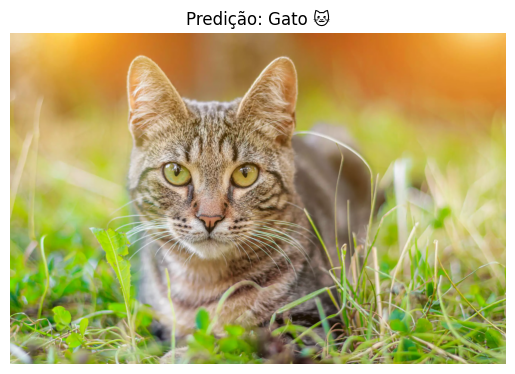

In [25]:
import matplotlib.pyplot as plt

# Exibir a imagem
plt.imshow(Image.open(image_path))
plt.axis('off')
plt.title("Predição: Cachorro 🐶" if prediction[0][0] > 0.5 else "Predição: Gato 🐱")
plt.show()
